In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_square_domain(length: int) -> np.ndarray:
    domain = [i / length for i in range(-1*length, length+1)]
    data = []
    for x in domain:
        for y in domain:
            data.append((x, y))   
    return np.array(data)

In [3]:
d = generate_square_domain(100)

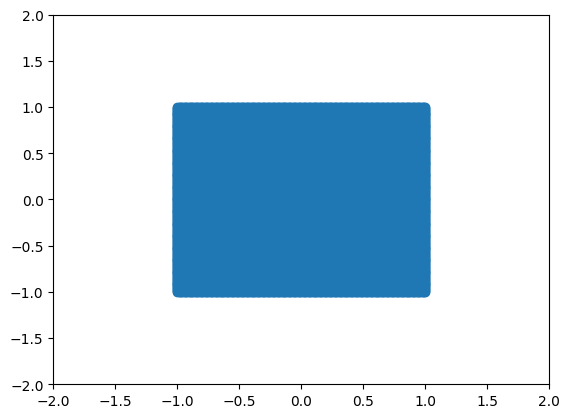

In [4]:
plt.scatter(d[:, 0], d[:, 1])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

In [5]:
def generate_circular_domain(length) -> np.ndarray:
    domain = [i / length for i in range(-1*length, length+1)]
    data = []
    for x in domain:
        for y in domain:
            if x**2 + y**2 <= 1:
                data.append((x, y))   
    return np.array(data)

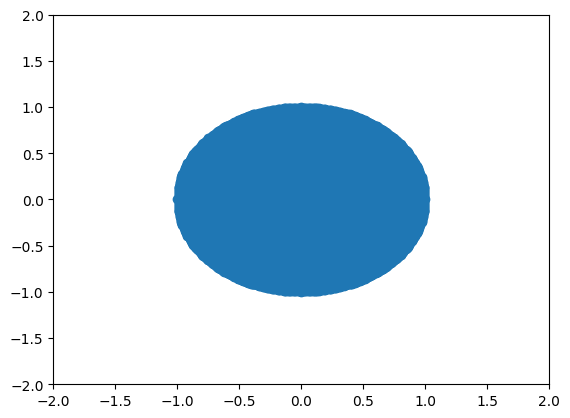

In [6]:
c = generate_circular_domain(100)
plt.scatter(c[:, 0], c[:, 1])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

In [7]:
import numpy as np

def f1(p):
    return np.sum(np.square(p) + p)

def f2(p):
    return np.sum(np.exp(p)) 

def F(points):
    data = []
    for p in points:
        data.append((f1(p), f2(p)))
    return np.array(data)

F(c).shape


(31417, 2)

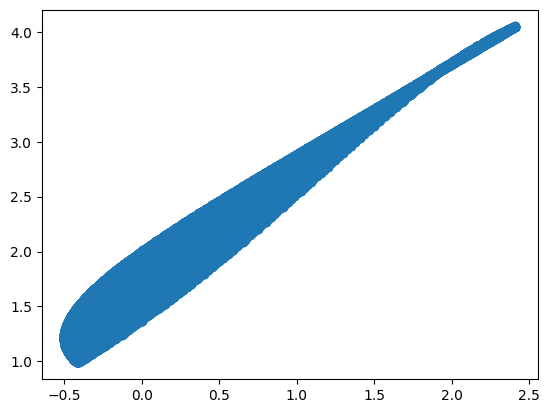

In [8]:
trans = F(c)
plt.scatter(trans[:, 0], trans[:, 1])

In [9]:
from app.algorithms.point import create_points_from_datapoints

points = create_points_from_datapoints(trans)

In [10]:
from app.algorithms.ideal_point import ideal_point_method

non_dom = ideal_point_method(points)

dom = [p for p in points if p not in non_dom]


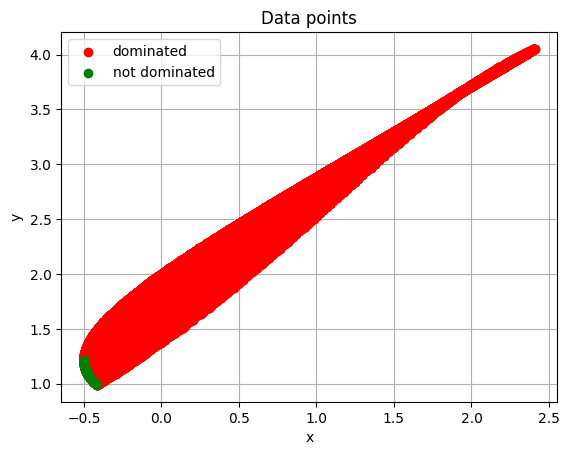

In [11]:
x = [p.x[0] for p in dom]
y = [p.x[1] for p in dom]
fig, ax = plt.subplots()
plt.grid()
ax.scatter(x, y, c="r", label="dominated", zorder=3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data points")

x = [p.x[0] for p in non_dom]
y = [p.x[1] for p in non_dom]
ax.scatter(x, y, c="g", label="not dominated", zorder=3)
plt.legend()

In [12]:
def linear_function_scalarisation(points, weights):
    return  np.array([np.dot(p.x, weights) for p in points])


In [13]:
linear_function_scalarisation(non_dom, np.array([0.4, 0.6])).shape

(42,)

In [14]:
min_index = np.argmin(linear_function_scalarisation(non_dom, np.array([0.4, 0.6])))
non_dom[min_index]

Point([-0.4159     0.9882295])

In [32]:
def epsilon_limits_scalarisation(points, limits, j):
    result = []
    for p in points:
        valid = True
        for i in range(len(p.x)):
            if i != j and p.x[i] > limits[i]:
                valid = False
                break
        if valid:
            result.append(f2(p.x))
    return np.array(result)

In [28]:
def grad_f1(p):
    return 2 * p + 1

def gradient_descent(initial_point, learning_rate, iterations):
    p = initial_point
    for _ in range(iterations):
        gradient = grad_f1(p)
        p = p - learning_rate * gradient
    return f1(p), p

In [37]:
min_value, min_point = gradient_descent(np.array([2, 3]), 0.1, 100)
print(f"Minimum value of f1 function: {min_value} for the point: {min_point}")

Minimum value of f1 function: -0.5 for the point: [-0.5 -0.5]


In [38]:
epsilon_limits_scalarisation(non_dom, np.array([1.5, 2.0]), min_value).shape

(42,)

In [39]:
min_index = np.argmin(epsilon_limits_scalarisation(non_dom, np.array([1.5, 2.0]), min_value))
non_dom[min_index]

Point([-0.4159     0.9882295])